In [1]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv("../data/insurance.csv")

In [6]:
cat_cols = df.select_dtypes(include='object').columns.tolist()
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)
print(df.dtypes.value_counts())

bool       1547
float64      10
int64         4
Name: count, dtype: int64


In [7]:
# Only keep rows where a claim was made
df_claims = df[df['TotalClaims'] > 0].copy()

# Drop columns not usable or redundant
drop_cols = ['PolicyID', 'TransactionMonth', 'UnderwrittenCoverID']
df_claims.drop(columns=[col for col in drop_cols if col in df_claims.columns], inplace=True)

# Handle missing values (simple imputation or drop)
df_claims = df_claims.dropna(thresh=len(df_claims) * 0.9, axis=1)  # drop columns with too many missing
df_claims = df_claims.dropna()  # drop remaining rows with missing values

# Feature: Age of Car
df_claims['VehicleAge'] = 2025 - df_claims['RegistrationYear']

# Encode categorical features
categorical_cols = df_claims.select_dtypes(include=['object', 'category']).columns
df_encoded = pd.get_dummies(df_claims, columns=categorical_cols, drop_first=True)

# Split into features and target
X = df_encoded.drop('TotalClaims', axis=1)
y = df_encoded['TotalClaims']

# Train-test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
# Initialize and fit model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict
y_pred = lr_model.predict(X_test)

# Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression Performance:")
print(f" RMSE: {rmse:.2f}")
print(f" R² Score: {r2:.4f}")

Linear Regression Performance:
 RMSE: 54626.74
 R² Score: -0.8555


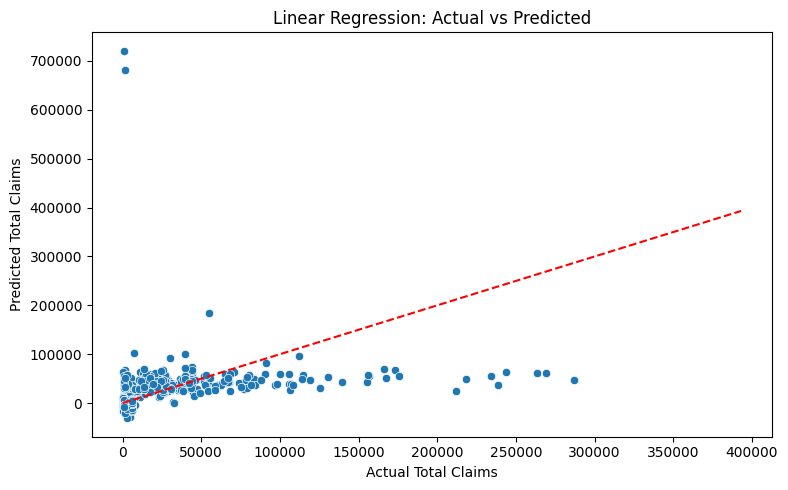

In [9]:
# Scatter plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Total Claims")
plt.ylabel("Predicted Total Claims")
plt.title("Linear Regression: Actual vs Predicted")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # reference line
plt.tight_layout()
plt.show()